In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("/Users/kimabcouwer/Projects/data-science-challenge")

import src.utils.helper_functions as hf

raw_training_data = pd.read_csv("../data/raw/Training_dataset.csv")


In [9]:
# Preprocess data
raw_training_data.head()

,ListingID,SellerCity,SellerIsPriv,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerState,SellerZip,VehBodystyle,...,VehMake,VehMileage,VehModel,VehPriceLabel,VehSellerNotes,VehType,VehTransmission,VehYear,Vehicle_Trim,Dealer_Listing_Price
0,3287,Warren,False,Inventory Command Center,Prime Motorz,5.0,32,MI,48091.0,SUV,...,Jeep,39319.0,Grand Cherokee,Fair Price,NaN,Used,Automatic 8-Speed,2015,High Altitude,30990.0
1,3920,Fargo,False,Cadillac Certified Program,Gateway Chevrolet Cadillac,4.8,1456,ND,58103.0,SUV,...,Cadillac,30352.0,XT5,Good Deal,Come take a look at our great pre-owned invent...,Used,NaN,2017,NaN,34860.0
2,4777,Waukesha,False,Jeep Certified Program,Wilde Chrysler Jeep Dodge Ram &amp; Subaru,4.8,1405,WI,53186.0,SUV,...,Jeep,38957.0,Grand Cherokee,Good Deal,Backed by a rigorous 125-point inspection by f...,Used,8-Speed Automatic w/OD,2015,Laredo,23249.0
3,6242,Wentzville,False,Inventory Command Center,Century Dodge Chrysler Jeep RAM,4.4,21,MO,63385.0,SUV,...,Jeep,20404.0,Grand Cherokee,Good Deal,Drop by to see us and you will quickly see how...,Used,Automatic,2018,Limited,31977.0
4,7108,Fayetteville,False,HomeNet Automotive,Superior Buick GMC of Fayetteville,3.7,74,AR,72703.0,SUV,...,Cadillac,19788.0,XT5,Good Deal,"Luxury, Exterior Parking Camera Rear, Front Du...",Used,8-Speed Automatic,2018,Luxury,33495.0


In [10]:
# Reassign index
data = hf.reassign_index(raw_training_data)
data.head()

,SellerCity,SellerIsPriv,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerState,SellerZip,VehBodystyle,VehCertified,...,VehMake,VehMileage,VehModel,VehPriceLabel,VehSellerNotes,VehType,VehTransmission,VehYear,Vehicle_Trim,Dealer_Listing_Price
ListingID,,,,,,,,,,,,,,,,,,,,,
3287,Warren,False,Inventory Command Center,Prime Motorz,5.0,32,MI,48091.0,SUV,False,...,Jeep,39319.0,Grand Cherokee,Fair Price,NaN,Used,Automatic 8-Speed,2015,High Altitude,30990.0
3920,Fargo,False,Cadillac Certified Program,Gateway Chevrolet Cadillac,4.8,1456,ND,58103.0,SUV,True,...,Cadillac,30352.0,XT5,Good Deal,Come take a look at our great pre-owned invent...,Used,NaN,2017,NaN,34860.0
4777,Waukesha,False,Jeep Certified Program,Wilde Chrysler Jeep Dodge Ram &amp; Subaru,4.8,1405,WI,53186.0,SUV,True,...,Jeep,38957.0,Grand Cherokee,Good Deal,Backed by a rigorous 125-point inspection by f...,Used,8-Speed Automatic w/OD,2015,Laredo,23249.0
6242,Wentzville,False,Inventory Command Center,Century Dodge Chrysler Jeep RAM,4.4,21,MO,63385.0,SUV,False,...,Jeep,20404.0,Grand Cherokee,Good Deal,Drop by to see us and you will quickly see how...,Used,Automatic,2018,Limited,31977.0
7108,Fayetteville,False,HomeNet Automotive,Superior Buick GMC of Fayetteville,3.7,74,AR,72703.0,SUV,False,...,Cadillac,19788.0,XT5,Good Deal,"Luxury, Exterior Parking Camera Rear, Front Du...",Used,8-Speed Automatic,2018,Luxury,33495.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6298 entries, 3287 to 8620012
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SellerCity            6298 non-null   object 
 1   SellerIsPriv          6298 non-null   bool   
 2   SellerListSrc         6296 non-null   object 
 3   SellerName            6298 non-null   object 
 4   SellerRating          6298 non-null   float64
 5   SellerRevCnt          6298 non-null   int64  
 6   SellerState           6298 non-null   object 
 7   SellerZip             6296 non-null   float64
 8   VehBodystyle          6298 non-null   object 
 9   VehCertified          6298 non-null   bool   
 10  VehColorExt           6225 non-null   object 
 11  VehColorInt           5570 non-null   object 
 12  VehDriveTrain         5897 non-null   object 
 13  VehEngine             5937 non-null   object 
 14  VehFeats              6023 non-null   object 
 15  VehFuel             

In [12]:
data = hf.create_location_column(data)
data = hf.create_car_age_column(data)

In [13]:
# Drop columns
data = hf.drop_columns(data)

print("\n Data shape after dropping columns: ", data.shape)
data.info()

KeyError: "['SellerState', 'SellerCity'] not found in axis"

In [ ]:
# Drop rows with missing values
data = data.dropna()

# Data shape after dropping rows with missing values
print("\n Data shape after dropping rows with missing values: ", data.shape)

# Display the number of missing records is each column
print("\n Number of missing records in each column:\n", data.isnull().sum())


 Data shape after dropping rows with missing values:  (5472, 13)

 Number of missing records in each column:
 SellerIsPriv            0
SellerRating            0
VehColorExt             0
VehDriveTrain           0
VehFeats                0
VehFuel                 0
VehHistory              0
VehMake                 0
VehMileage              0
VehPriceLabel           0
Dealer_Listing_Price    0
SellerLocation          0
Car_Age                 0
dtype: int64


In [ ]:
# Display the percentage of missing records in each column
(data.isnull().sum()/(len(data)))*100

SellerIsPriv            0.0
SellerRating            0.0
VehColorExt             0.0
VehDriveTrain           0.0
VehFeats                0.0
VehFuel                 0.0
VehHistory              0.0
VehMake                 0.0
VehMileage              0.0
VehPriceLabel           0.0
Dealer_Listing_Price    0.0
SellerLocation          0.0
Car_Age                 0.0
dtype: float64

In [ ]:
print("\n Number of unique values in each column: ")
data.nunique()



 Number of unique values in each column: 


SellerIsPriv               1
SellerRating              40
VehColorExt              163
VehDriveTrain             17
VehFeats                 753
VehFuel                    4
VehHistory                32
VehMake                    2
VehMileage              4631
VehPriceLabel              3
Dealer_Listing_Price    2626
SellerLocation          1369
Car_Age                    5
dtype: int64

In [ ]:
# Examine VehColorExt values
print("\n VehColorExt values: ")
data["VehColorExt"].value_counts()


 VehColorExt values: 


VehColorExt
Bright White Clearcoat                 546
Brilliant Black Crystal Pearlcoat      354
Billet Silver Metallic Clearcoat       341
Stellar Black Metallic                 304
Radiant Silver Metallic                253
                                      ... 
True Blue Pearl                          1
Beige                                    1
Other                                    1
Granite Chrystal Metallic Clearcoat      1
Steel Gray                               1
Name: count, Length: 163, dtype: int64

In [ ]:
# Examine Veh Trim values
# print("\n Veh Trim values: ")
# data["Vehicle_Trim"].value_counts()

In [ ]:
# Examine VehDriveTrain values
print("\n VehDriveTrain values: ")
data["VehDriveTrain"].value_counts()


 VehDriveTrain values: 


VehDriveTrain
4WD                                                           3614
FWD                                                           1020
AWD                                                            689
4X4                                                             41
Four Wheel Drive                                                35
All Wheel Drive                                                 19
Front Wheel Drive                                               16
4x4                                                             12
4x4/4WD                                                          9
AWD or 4x4                                                       6
All-wheel Drive                                                  5
ALL WHEEL                                                        1
AllWheelDrive                                                    1
ALL-WHEEL DRIVE WITH LOCKING AND LIMITED-SLIP DIFFERENTIAL       1
2WD                                             

In [ ]:
# Examine VehEngine values
# print("\n VehEngine values: ")
# data["VehEngine"].value_counts()

In [ ]:
# Examine VehFuel values
print("\n VehFuel values: ")
data["VehFuel"].value_counts()


 VehFuel values: 


VehFuel
Gasoline         5100
E85 Flex Fuel     327
Diesel             37
Unknown             8
Name: count, dtype: int64

In [ ]:
# Examine VehPriceLabel values
print("\n VehPriceLabel values: ")
data["VehPriceLabel"].value_counts()


 VehPriceLabel values: 


VehPriceLabel
Good Deal     4088
Great Deal     775
Fair Price     609
Name: count, dtype: int64

In [ ]:
# Examine VehFeats values
print("\n VehFeats values: ")
data["VehFeats"].value_counts()


 VehFeats values: 


VehFeats
['1st and 2nd row curtain head airbags', '4-wheel ABS Brakes', 'ABS and Driveline Traction Control', 'Anti-theft alarm system', 'Audio controls on steering wheel', 'Audio system memory card slot', 'Auxilliary engine cooler', 'Braking Assist']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [ ]:
# Clean data
print("\n Cleaning data...")
data = hf.clean_data(data)
data = data.dropna()

print("\n Number of unique values in each column: ")
data.nunique()


 Cleaning data...

 Number of unique values in each column: 


SellerIsPriv               1
SellerRating              40
VehColorExt               13
VehDriveTrain              4
VehFeats                 748
VehFuel                    3
VehMake                    2
VehMileage              4616
VehPriceLabel              3
Dealer_Listing_Price    2621
SellerLocation          1367
Car_Age                    5
Num_Owners                 5
Accident                   2
dtype: int64

In [ ]:
# Examine VehColorExt values after cleaning
print("\n VehColorExt values: ")
data["VehColorExt"].value_counts()


 VehColorExt values: 


VehColorExt
White     1810
Silver    1094
Gray      1000
Red        648
Black      635
Blue       168
Brown       54
Gold        19
Green       14
Bronze       4
Purple       3
Beige        2
Pink         2
Name: count, dtype: int64

In [ ]:
# Examine Veh Trim values after cleaning
# print("\n Veh Trim values: ")
# data["Vehicle_Trim"].value_counts()

In [ ]:
# Examine VehDriveTrain values after cleaning
print("\n VehDriveTrain values: ")
data["VehDriveTrain"].value_counts()


 VehDriveTrain values: 


VehDriveTrain
4WD    3693
FWD    1036
AWD     723
2WD       1
Name: count, dtype: int64

In [ ]:
# Examine VehEngine values
# print("\n VehEngine values: ")
# data["VehEngine"].value_counts()

In [ ]:
# Examine VehPriceLabel values
print("\n VehPriceLabel values: ")
data["VehPriceLabel"].value_counts()


 VehPriceLabel values: 


VehPriceLabel
Good Deal     4077
Great Deal     772
Fair Price     604
Name: count, dtype: int64

In [ ]:
data.nunique()

SellerIsPriv               1
SellerRating              40
VehColorExt               13
VehDriveTrain              4
VehFeats                 748
VehFuel                    3
VehMake                    2
VehMileage              4616
VehPriceLabel              3
Dealer_Listing_Price    2621
SellerLocation          1367
Car_Age                    5
Num_Owners                 5
Accident                   2
dtype: int64

In [ ]:
print("\nProcessed data:")
data.head()


Processed data:


,SellerIsPriv,SellerRating,VehColorExt,VehDriveTrain,VehFeats,VehFuel,VehMake,VehMileage,VehPriceLabel,Dealer_Listing_Price,SellerLocation,Car_Age,Num_Owners,Accident
ListingID,,,,,,,,,,,,,,
3287,False,5.0,White,4WD,"['Adaptive Cruise Control', 'Antilock Brakes',...",Gasoline,Jeep,39319.0,Fair Price,30990.0,"Warren, MI",8,1,0
4777,False,4.8,White,4WD,['18 WHEEL &amp; 8.4 RADIO GROUP-inc: Nav-Capa...,Gasoline,Jeep,38957.0,Good Deal,23249.0,"Waukesha, WI",8,1,0
6242,False,4.4,White,4WD,"['Android Auto', 'Antilock Brakes', 'Apple Car...",Gasoline,Jeep,20404.0,Good Deal,31977.0,"Wentzville, MO",5,1,0
7108,False,3.7,Silver,FWD,"['4-Wheel Disc Brakes', 'ABS', 'Adjustable Ste...",Gasoline,Cadillac,19788.0,Good Deal,33495.0,"Fayetteville, AR",5,1,0
10882,False,3.0,Silver,4WD,"['1st and 2nd row curtain head airbags', '4-wh...",Gasoline,Jeep,34649.0,Good Deal,27900.0,"Olean, NY",5,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5453 entries, 3287 to 8620012
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SellerIsPriv          5453 non-null   bool   
 1   SellerRating          5453 non-null   float64
 2   VehColorExt           5453 non-null   object 
 3   VehDriveTrain         5453 non-null   object 
 4   VehFeats              5453 non-null   object 
 5   VehFuel               5453 non-null   object 
 6   VehMake               5453 non-null   object 
 7   VehMileage            5453 non-null   float64
 8   VehPriceLabel         5453 non-null   object 
 9   Dealer_Listing_Price  5453 non-null   float64
 10  SellerLocation        5453 non-null   object 
 11  Car_Age               5453 non-null   int64  
 12  Num_Owners            5453 non-null   object 
 13  Accident              5453 non-null   int64  
dtypes: bool(1), float64(3), int64(2), object(8)
memory usage: 601.7+ KB


In [ ]:
data = hf.handle_categorical_data(data)
data.head()

,SellerIsPriv,SellerRating,VehFeats,VehMake,VehMileage,Dealer_Listing_Price,SellerLocation,Car_Age,Num_Owners,Accident,...,VehColorExt_Red,VehColorExt_Silver,VehColorExt_White,VehFuel_E85 Flex Fuel,VehFuel_Gasoline,VehDriveTrain_4WD,VehDriveTrain_AWD,VehDriveTrain_FWD,VehPriceLabel_Good Deal,VehPriceLabel_Great Deal
ListingID,,,,,,,,,,,,,,,,,,,,,
3287,False,5.0,"['Adaptive Cruise Control', 'Antilock Brakes',...",0,39319.0,30990.0,"Warren, MI",8,1,0,...,False,False,True,False,True,True,False,False,False,False
4777,False,4.8,['18 WHEEL &amp; 8.4 RADIO GROUP-inc: Nav-Capa...,0,38957.0,23249.0,"Waukesha, WI",8,1,0,...,False,False,True,False,True,True,False,False,True,False
6242,False,4.4,"['Android Auto', 'Antilock Brakes', 'Apple Car...",0,20404.0,31977.0,"Wentzville, MO",5,1,0,...,False,False,True,False,True,True,False,False,True,False
7108,False,3.7,"['4-Wheel Disc Brakes', 'ABS', 'Adjustable Ste...",1,19788.0,33495.0,"Fayetteville, AR",5,1,0,...,False,True,False,False,True,False,False,True,True,False
10882,False,3.0,"['1st and 2nd row curtain head airbags', '4-wh...",0,34649.0,27900.0,"Olean, NY",5,1,0,...,False,True,False,False,True,True,False,False,True,False


In [ ]:
# Evaluate the data
print("\n Data evaluation: ")
data.describe().T


 Data evaluation: 


,count,mean,std,min,25%,50%,75%,max
SellerRating,5453.0,4.176985,1.122180,0.0,4.0,4.6,4.8,5.0
VehMake,5453.0,0.320924,0.466875,0.0,0.0,0.0,1.0,1.0
VehMileage,5453.0,26470.264808,12964.865170,5.0,16993.0,26181.0,36618.0,83037.0
Dealer_Listing_Price,5453.0,32135.274344,7571.669519,18289.0,26800.0,31000.0,35920.0,89500.0
Car_Age,5453.0,6.213827,1.210485,4.0,5.0,6.0,8.0,8.0
Accident,5453.0,0.105997,0.307862,0.0,0.0,0.0,0.0,1.0


In [ ]:
data.columns

Index(['SellerIsPriv', 'SellerRating', 'VehFeats', 'VehMake', 'VehMileage',
       'Dealer_Listing_Price', 'SellerLocation', 'Car_Age', 'Num_Owners',
       'Accident', 'VehColorExt_Black', 'VehColorExt_Blue',
       'VehColorExt_Bronze', 'VehColorExt_Brown', 'VehColorExt_Gold',
       'VehColorExt_Gray', 'VehColorExt_Green', 'VehColorExt_Pink',
       'VehColorExt_Purple', 'VehColorExt_Red', 'VehColorExt_Silver',
       'VehColorExt_White', 'VehFuel_E85 Flex Fuel', 'VehFuel_Gasoline',
       'VehDriveTrain_4WD', 'VehDriveTrain_AWD', 'VehDriveTrain_FWD',
       'VehPriceLabel_Good Deal', 'VehPriceLabel_Great Deal'],
      dtype='object')

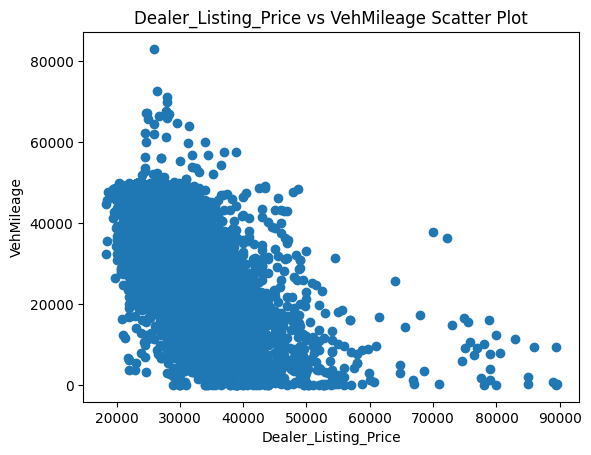

In [ ]:
# Visualize the data
hf.plot_data(data, 'Dealer_Listing_Price', 'VehMileage')

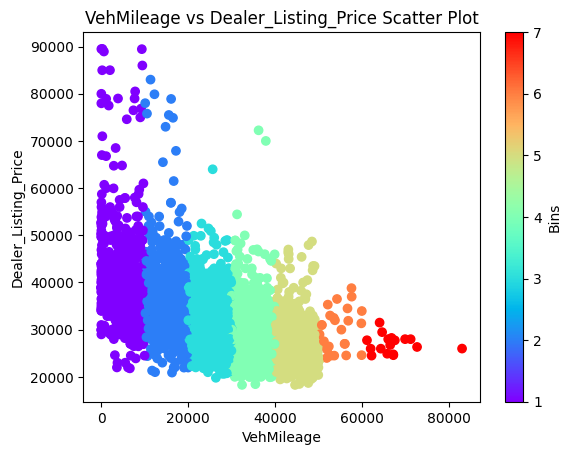

In [ ]:
# Color scatter plot with bins
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, float('inf')]
hf.plot_data_with_bins(data, 'VehMileage', bins, 'Dealer_Listing_Price')

In [ ]:
outliers = data.loc[data['VehMileage'] > 75000]
outliers.head()

,SellerIsPriv,SellerRating,VehFeats,VehMake,VehMileage,Dealer_Listing_Price,SellerLocation,Car_Age,Num_Owners,Accident,...,VehColorExt_Red,VehColorExt_Silver,VehColorExt_White,VehFuel_E85 Flex Fuel,VehFuel_Gasoline,VehDriveTrain_4WD,VehDriveTrain_AWD,VehDriveTrain_FWD,VehPriceLabel_Good Deal,VehPriceLabel_Great Deal
ListingID,,,,,,,,,,,,,,,,,,,,,
5785275,False,4.1,"['All Wheel Drive', 'Alloy Wheels', 'Android A...",1,83037.0,25991.0,"Port St Lucie, FL",6,3,1,...,False,True,False,False,True,False,True,False,True,False


<Axes: xlabel='VehMileage'>

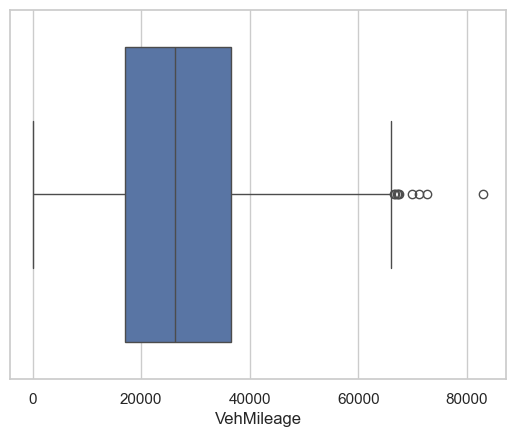

In [ ]:
# Visualize VehMileage boxplot
hf.plot_boxplot(data, 'VehMileage')

In [ ]:
# Remove outliers
data = hf.remove_outliers(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5157 entries, 3287 to 8620012
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SellerIsPriv              5157 non-null   bool   
 1   SellerRating              5157 non-null   float64
 2   VehFeats                  5157 non-null   object 
 3   VehMake                   5157 non-null   int64  
 4   VehMileage                5157 non-null   float64
 5   Dealer_Listing_Price      5157 non-null   float64
 6   SellerLocation            5157 non-null   object 
 7   Car_Age                   5157 non-null   int64  
 8   Num_Owners                5157 non-null   object 
 9   Accident                  5157 non-null   int64  
 10  VehColorExt_Black         5157 non-null   bool   
 11  VehColorExt_Blue          5157 non-null   bool   
 12  VehColorExt_Bronze        5157 non-null   bool   
 13  VehColorExt_Brown         5157 non-null   bool   
 14  VehColo

<Axes: xlabel='VehMileage'>

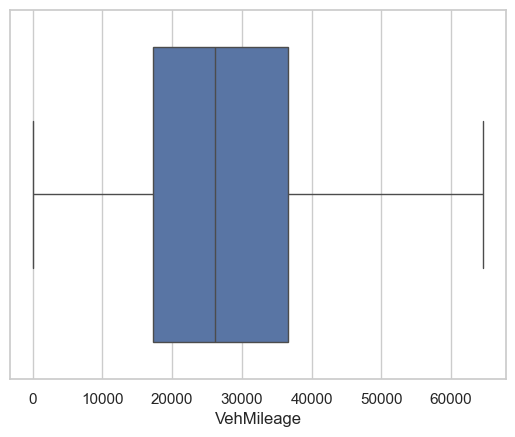

In [ ]:
# Visualize VehMileage boxplot after removing outliers
hf.plot_boxplot(data, 'VehMileage')

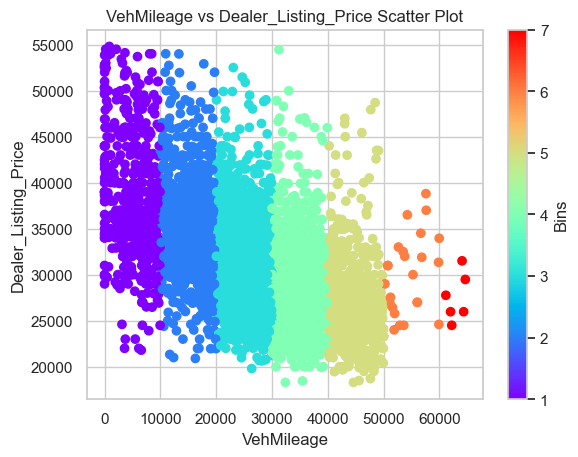

In [ ]:
# Color scatter plot with bins after removing outliers
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, float('inf')]
hf.plot_data_with_bins(data, 'VehMileage', bins, 'Dealer_Listing_Price')

In [ ]:
# Bin Dealer_Listing_Price
print("\n Binning Dealer_Listing_Price...")
data = hf.bin_numeric_columns(data)
data.info()


 Binning Dealer_Listing_Price...
<class 'pandas.core.frame.DataFrame'>
Index: 6298 entries, 3287 to 8620012
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SellerIsPriv          6298 non-null   bool   
 1   SellerListSrc         6296 non-null   object 
 2   SellerName            6298 non-null   object 
 3   SellerRevCnt          6298 non-null   int64  
 4   SellerZip             6296 non-null   float64
 5   VehBodystyle          6298 non-null   object 
 6   VehCertified          6298 non-null   bool   
 7   VehColorExt           6225 non-null   object 
 8   VehColorInt           5570 non-null   object 
 9   VehDriveTrain         5897 non-null   object 
 10  VehEngine             5937 non-null   object 
 11  VehFeats              6023 non-null   object 
 12  VehFuel               6296 non-null   object 
 13  VehHistory            6097 non-null   object 
 14  VehListdays           6296 non-null  